#
#Observations:
#1. If your city is between zero and 20 "(latitude), you are most likely to have warm weather(>70).
#2. There seems be no strong correlation between humidity and latitudes, according to the scatterplot graph. 
#3. There also seems to be no strong correlation between cloudiness and the latitudes. 

In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

#Import API key
from api_keys import weather_api_key

#define API key
api_key = weather_api_key


## Generate Cities List

In [12]:
#Import citipy 
from citipy import citipy

#make lists for cities and latitudes and longitudes
lats_longs = []
cities = []

# Make an random list of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = zip(lats, longs)

# Find the nearest city for each latitude and longitude
for lat_long in lats_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
       
    # If the city is unique, then add it to the cities list
    if city not in cities:

        cities.append(city)

# Print number of cities
print(len(cities))

599


In [13]:
#Make base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

#Start record count and set count number at 1
record_count = 1
set_count = 1

#create list to fill with city data
city_data = []

#Iterate over each row
for i, city in enumerate(cities):
    #Set time delay to avoid api requests being denied.
    time.sleep(0.25)
    #limit each set to 50 and add new sets starting the record count over at zero.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #print record and set count along with city name
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    #add to record count
    record_count += 1
    url = f"{base_url}&q={city}"
    #perform requests for api data for all variables needed
    try:
        weather = requests.get(url).json()
        city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        long = weather['coord']['lon']
        country = weather['sys']['country']
        date = weather['dt']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_wind_speed = weather['wind']['speed']
        city_clouds = weather['clouds']['all']
        
        #Add data requested into city_data and convert to dictionary
        city_data.append({"City": city,
                      "Temperature" : city_max_temp,
                      "Humidity" : city_humidity,
                      "Longitude" : long,
                      "Latitude" : lat,
                      "Cloudiness" : city_clouds,
                      "Country" : country,
                      "Windspeed" : city_wind_speed,
                      "Date" : date
                      })
    #add exceptions when city is not found to keep the code running
    except:
        #add print statement for when exception is found
        print('city not found.Skipping...')

        pass

#print when done running
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 of set 1 | port alfred
Processing Record 2 of set 1 | antofagasta
Processing Record 3 of set 1 | yurimaguas
Processing Record 4 of set 1 | champasak
Processing Record 5 of set 1 | amderma
city not found.Skipping...
Processing Record 6 of set 1 | avarua
Processing Record 7 of set 1 | bluff
Processing Record 8 of set 1 | tel aviv-yafo
Processing Record 9 of set 1 | fortuna
Processing Record 10 of set 1 | teya
Processing Record 11 of set 1 | ushuaia
Processing Record 12 of set 1 | dikson
Processing Record 13 of set 1 | pevek
Processing Record 14 of set 1 | huangnihe
Processing Record 15 of set 1 | mattru
Processing Record 16 of set 1 | hilo
Processing Record 17 of set 1 | airai
Processing Record 18 of set 1 | mataura
Processing Record 19 of set 1 | bemidji
Processing Record 20 of set 1 | cayenne
Processing Record 21 of set 1 | wattegama
Processing Record 22 of set 1 | yellowknife
Processing Record 23 of set 1 | krasnoye
Processing Record 24 of set 1 | bethel
Processing

Processing Record 40 of set 4 | kodiak
Processing Record 41 of set 4 | sorvag
city not found.Skipping...
Processing Record 42 of set 4 | erenhot
Processing Record 43 of set 4 | maun
Processing Record 44 of set 4 | palembang
Processing Record 45 of set 4 | tautira
Processing Record 46 of set 4 | adrar
Processing Record 47 of set 4 | honiara
Processing Record 48 of set 4 | xinyang
Processing Record 49 of set 4 | qaanaaq
Processing Record 0 of set 5 | nguiu
city not found.Skipping...
Processing Record 1 of set 5 | constitucion
Processing Record 2 of set 5 | grindavik
Processing Record 3 of set 5 | sorland
Processing Record 4 of set 5 | bengkulu
Processing Record 5 of set 5 | algiers
Processing Record 6 of set 5 | illoqqortoormiut
city not found.Skipping...
Processing Record 7 of set 5 | leningradskiy
Processing Record 8 of set 5 | bagaha
Processing Record 9 of set 5 | cherskiy
Processing Record 10 of set 5 | marawi
Processing Record 11 of set 5 | kalabo
Processing Record 12 of set 5 | jep

Processing Record 29 of set 8 | kitimat
Processing Record 30 of set 8 | veraval
Processing Record 31 of set 8 | galway
Processing Record 32 of set 8 | ponta delgada
Processing Record 33 of set 8 | sawakin
Processing Record 34 of set 8 | lavrentiya
Processing Record 35 of set 8 | birao
Processing Record 36 of set 8 | vung tau
Processing Record 37 of set 8 | evanton
Processing Record 38 of set 8 | san vicente de canete
Processing Record 39 of set 8 | batesville
Processing Record 40 of set 8 | coihueco
Processing Record 41 of set 8 | sumy
Processing Record 42 of set 8 | laguna
Processing Record 43 of set 8 | grandola
Processing Record 44 of set 8 | labutta
city not found.Skipping...
Processing Record 45 of set 8 | meyungs
city not found.Skipping...
Processing Record 46 of set 8 | ubrique
Processing Record 47 of set 8 | pousat
city not found.Skipping...
Processing Record 48 of set 8 | khovu-aksy
Processing Record 49 of set 8 | norman wells
Processing Record 0 of set 9 | shuya
Processing Re

Processing Record 15 of set 12 | kulhudhuffushi
Processing Record 16 of set 12 | mongo
Processing Record 17 of set 12 | maragogi
Processing Record 18 of set 12 | savannah bight
Processing Record 19 of set 12 | plettenberg bay
Processing Record 20 of set 12 | neuquen
Processing Record 21 of set 12 | mayor pablo lagerenza
Processing Record 22 of set 12 | mapiripan
Processing Record 23 of set 12 | suozhen
Processing Record 24 of set 12 | tsienyane
city not found.Skipping...
Processing Record 25 of set 12 | buraydah
Processing Record 26 of set 12 | kholodnyy
Processing Record 27 of set 12 | marzuq
Processing Record 28 of set 12 | katobu
Processing Record 29 of set 12 | tupelo
Processing Record 30 of set 12 | pathein
Processing Record 31 of set 12 | naze
Processing Record 32 of set 12 | taoudenni
Processing Record 33 of set 12 | kisangani
Processing Record 34 of set 12 | vieux-habitants
Processing Record 35 of set 12 | binghamton
Processing Record 36 of set 12 | margate
Processing Record 37

In [14]:
#create dataframe from api data collected
city_weather_df = pd.DataFrame.from_dict(city_data) 

#save data to csv
city_weather_csv = city_weather_df.to_csv("output_data/city_weather.csv", encoding="utf-8", index=True)

#print dataframe
city_weather_df

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,port alfred,64.72,83,26.89,-33.59,56,ZA,19.89,1603144715
1,antofagasta,59.00,82,-70.40,-23.65,90,CL,12.75,1603144715
2,yurimaguas,93.02,41,-76.08,-5.90,95,PE,3.71,1603144715
3,champasak,70.95,99,106.00,14.75,85,LA,0.72,1603144716
4,avarua,80.60,78,-159.78,-21.21,6,CK,6.93,1603144716
...,...,...,...,...,...,...,...,...,...
537,beringovskiy,38.30,80,179.32,63.05,88,RU,10.29,1603144948
538,xuddur,72.95,83,43.89,4.12,85,SO,10.60,1603144949
539,znamenskoye,41.50,81,73.83,57.13,100,RU,6.24,1603144949
540,oudtshoorn,55.40,100,22.20,-33.59,100,ZA,9.17,1603144950


## Latitude vs. Temperature Plot

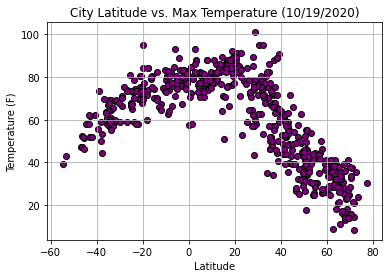

In [15]:
#define variables
city_lat = city_weather_df["Latitude"]
city_temp = city_weather_df["Temperature"]
date = datetime.date.today()
date = time.strftime("(%m/%d/%Y)")

#set plot parameters
plt.scatter(city_lat, city_temp, marker="o", facecolor="purple", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Temperature.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

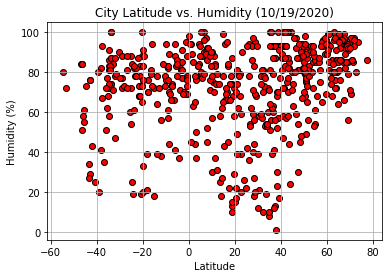

In [16]:
#define variables
city_humid = city_weather_df["Humidity"]

#set plot parameters
plt.scatter(city_lat, city_humid, marker="o", facecolor="red", edgecolor="black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Humidity.png")

#show plot
plt.show()


## Latitude vs. Cloudiness Plot

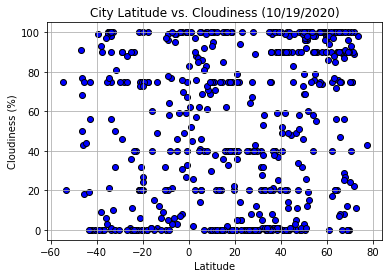

In [17]:
#define variables
city_cloud = city_weather_df["Cloudiness"]

#set plot parameters
plt.scatter(city_lat, city_cloud, marker="o", facecolor="blue", edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

#show plot
plt.show()

## Latitude vs. Wind Speed Plot

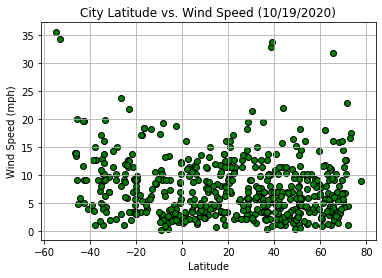

In [18]:
#define variables
city_wind = city_weather_df["Windspeed"]

#set plot parameters
plt.scatter(city_lat, city_wind, marker="o", facecolor="green", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save plot as png
plt.savefig("output_data/Latitude_vs_Wind_speed.png")

#show plot
plt.show()


## Linear Regression

In [19]:
#"seperate" northern and southern hemispheres
north_hemi = city_weather_df.loc[city_weather_df["Latitude"]>=0]
south_hemi = city_weather_df.loc[city_weather_df["Latitude"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.87


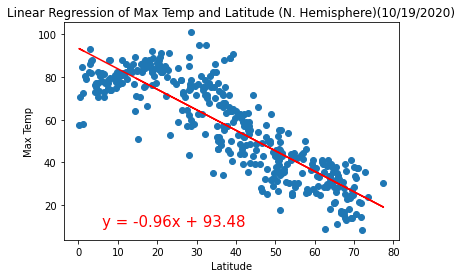

In [20]:
#define variables
north_lat = north_hemi["Latitude"]
north_temp = north_hemi["Temperature"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_temp, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_temp
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_MaxTemp_vs_Lat_regression.png")

#display chart
plt.show()

#This graph shows a strong negative correlation between max temp and latitude in the northern hemisphere. Therefore, if you travel north it is most likly to be colder. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.79


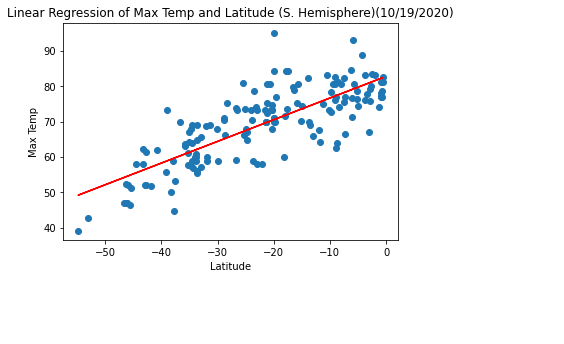

In [21]:
#define variables
south_lat = south_hemi["Latitude"]
south_temp = south_hemi["Temperature"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_temp, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_temp
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_MaxTemp_vs_Lat_regression.png")

#display chart
plt.show()


#This graph shows a strong positive correlation between max temp and latitude in the south hemisphere. Therefore, if you travel south, the warmer the temps should be. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3


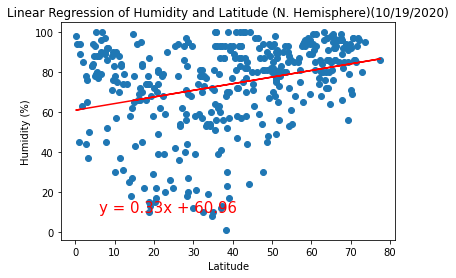

In [22]:
#define variables
north_humid = north_hemi["Humidity"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_humid, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_humid
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_Humidity_vs_Lat_regression.png")

#display chart
plt.show()

#This graph shows a weak positive correctlation between humidity and latitude in the north hemisphere. The graph is too weak to be able to make any assumptions. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12


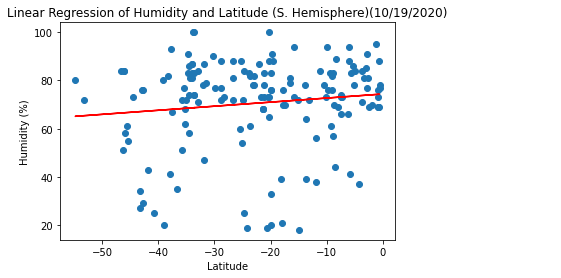

In [23]:
#define variables
south_humid = south_hemi["Humidity"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_humid, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_humid
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_Humidity_vs_Lat_regression.png")

#display chart
plt.show()


#This graph shows no concrete correlation between humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21


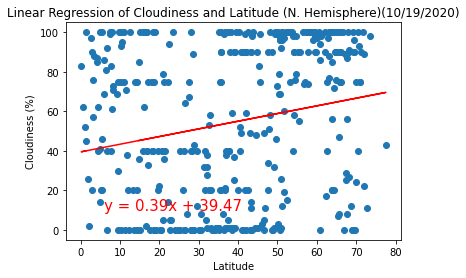

In [24]:
#define variables
north_cloud = north_hemi["Cloudiness"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_cloud, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_cloud
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_Cloudiness_vs_Lat_regression.png")

#display chart
plt.show()

#This graph shows a weak positive correlation between cloudiness and latityde in the northern hemisphere. The graph is too weak to make any assumptions. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01


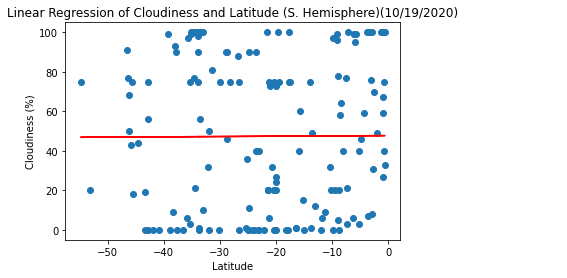

In [25]:
#define variables
south_cloud = south_hemi["Cloudiness"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_cloud, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_cloud
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_Cloudiness_vs_Lat_regression.png")

#display chart
plt.show()

#This graph shows no correlation between cloudiness and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0


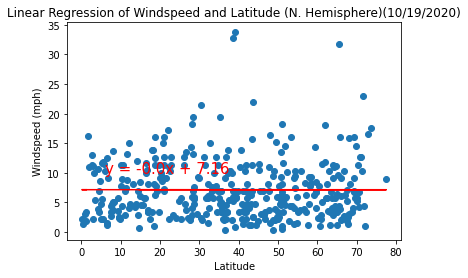

In [26]:
#define variables
north_wind = north_hemi["Windspeed"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(north_wind, north_lat)[0],2)}")

#set variables for linear regression
x_values = north_lat
y_values = north_wind
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (N. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/N_Hemi_Windspeed_vs_Lat_regression.png")

#display chart
plt.show()

#This graph is has a weak correction, therefore no assumptions can be made. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.35


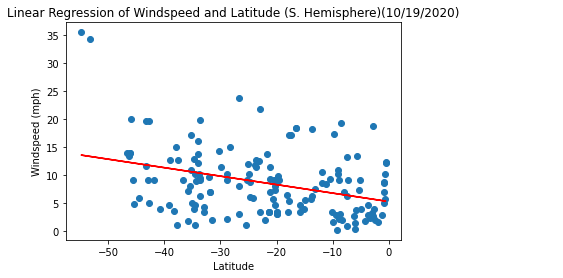

In [27]:
#define variables
south_wind = south_hemi["Windspeed"]

#calculate and print pearson coefficient
print(f"The r-value is: {round(st.pearsonr(south_wind, south_lat)[0],2)}")

#set variables for linear regression
x_values = south_lat
y_values = south_wind
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (S. Hemisphere){date}")

#save chart as png
plt.savefig("output_data/S_Hemi_Windspeed_vs_Lat_regression.png")

#display chart
plt.show()

#This chart has a vey weak negative between wind speed and latitude in the southern hemisphere. Therefore, no significant data can be gathered from this data. 